## Package tools

Scipy implements a number of algorithms for calcualting the eigendecomposition:

$$A = V \Lambda V^{-1}$$

where
* $V$ is the matrix whose columns are the eigenvectors
* $\Lambda$ is a diagonal matrix with the eigenvalues on the diagonal

Variants only calculate the eigenvalues (faster) or take advantage of symmetries / sparsity, and numerical stability.

| **Method**           | **Type**                   | **Use Case**                                                                                          |
|-----------------------|----------------------------|-------------------------------------------------------------------------------------------------------|
| **`eig`**            | Dense (general matrix)     | Computes all eigenvalues and eigenvectors of a square matrix.                                         |
| **`eigvals`**        | Dense (general matrix)     | Computes only eigenvalues of a square matrix (faster than `eig`).                                     |
| **`eigh`**           | Dense (symmetric/Hermitian)| Computes eigenvalues and eigenvectors for symmetric or Hermitian matrices (numerically stable).       |
| **`eigvalsh`**       | Dense (symmetric/Hermitian)| Computes only eigenvalues of symmetric or Hermitian matrices (faster than `eigh`).                   |
| **`eigsh`**          | Sparse (symmetric/Hermitian) | Computes a subset of eigenvalues and eigenvectors for sparse symmetric or Hermitian matrices.         |
| **`eigs`**           | Sparse (general matrix)    | Computes a subset of eigenvalues and eigenvectors for sparse general (non-symmetric) matrices.        |

Eigendecomposition is sometimes called *diagonalization*.

#### Example: Find the fundamental vibrational modes of a square membrane.

The vibrational modes are solutions to the Laplace equation:
$$ \nabla^2 u = 0 \quad u=0 \ on \ boundary$$


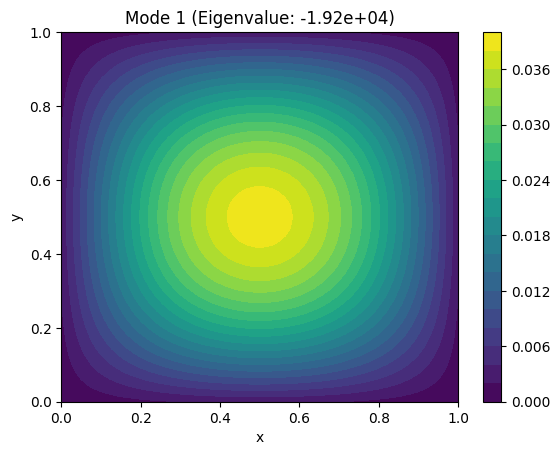

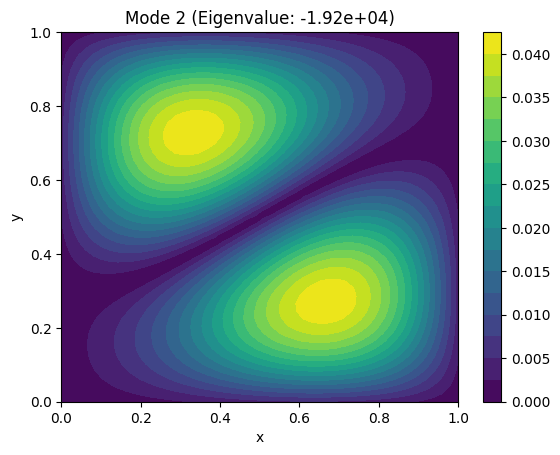

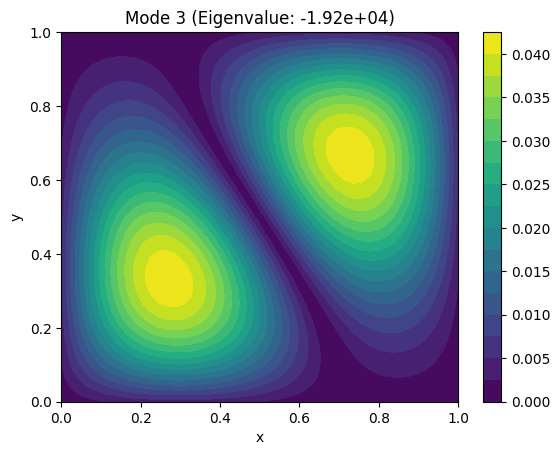

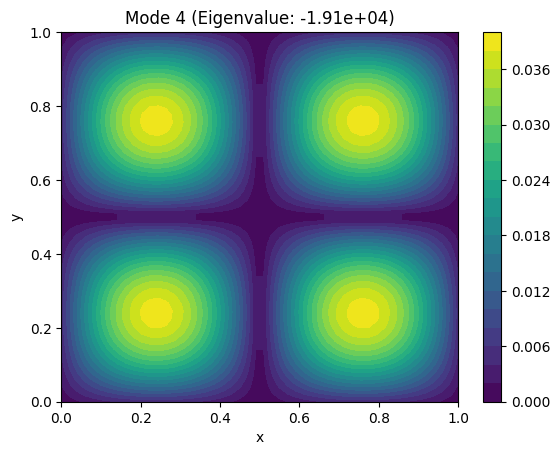

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Grid properties
Lx = 1.0  # Length in the x-direction
Ly = 1.0  # Length in the y-direction
Nx = 50   # Number of grid points in the x-direction
Ny = 50   # Number of grid points in the y-direction

dx = Lx / (Nx - 1)  # Grid spacing in the x-direction
dy = Ly / (Ny - 1)  # Grid spacing in the y-direction

# Construct the Laplacian operator for the 2D grid
def construct_laplacian_2d(Nx, Ny, dx, dy):
    N = Nx * Ny
    laplacian = np.zeros((N, N))

    for i in range(N):
        laplacian[i, i] = -2 / dx**2 - 2 / dy**2

        if i % Nx != 0:  # Left neighbor
            laplacian[i, i - 1] = 1 / dx**2
        if (i + 1) % Nx != 0:  # Right neighbor
            laplacian[i, i + 1] = 1 / dx**2
        if i >= Nx:  # Top neighbor
            laplacian[i, i - Nx] = 1 / dy**2
        if i < N - Nx:  # Bottom neighbor
            laplacian[i, i + Nx] = 1 / dy**2

    return laplacian

# Construct the Laplacian matrix
laplacian = construct_laplacian_2d(Nx, Ny, dx, dy)

# Solve the eigenvalue problem
eigenvalues, eigenvectors = eigh(laplacian)

# Extract the first few modes
modes = 4
eigenfunctions = [eigenvectors[:, i].reshape(Nx, Ny) for i in range(modes)]

# Plot the first few eigenfunctions (vibration modes)
for i, eigenfunction in enumerate(eigenfunctions):
    plt.figure()
    plt.contourf(np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny), abs(eigenfunction), 20, cmap="viridis")
    plt.colorbar()
    plt.title(f"Mode {i+1} (Eigenvalue: {eigenvalues[i]:.2e})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()
